In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1: Load the Dataset
# Path to the saved dataset
file_path = r"C:\Users\USER\boston_housing.csv"

In [6]:
# Load the dataset
data = pd.read_csv(file_path)

In [8]:
# Display the first few rows
print("Dataset Loaded:\n", data.head())

Dataset Loaded:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [10]:
# Step 2: Brief Data Description
print("\n--- Dataset Information ---")
print(data.info())

print("\n--- Dataset Summary Statistics ---")
print(data.describe())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

--- Dataset Summary Statistics ---
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mea

In [12]:
# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print("\n--- Checking for Missing Values ---")
print(data.isnull().sum())

# Features (X) and target variable (y)
X = data.drop(columns=['medv'])  # 'medv' is the target variable
y = data['medv']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n--- Data Split into Training and Test Sets ---")
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")


--- Checking for Missing Values ---
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

--- Data Split into Training and Test Sets ---
Training Set Size: 404 samples
Testing Set Size: 102 samples


In [14]:
# Step 4: Modeling - Linear Regression, Polynomial Regression, and Ridge/Lasso Regression

# Model 1: Simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Simple Linear Regression Results ---")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr):.4f}")



--- Simple Linear Regression Results ---
R^2 Score: 0.6688
Mean Squared Error (MSE): 24.2911


In [16]:
# Model 1: Simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Simple Linear Regression Results ---")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr):.4f}")


--- Simple Linear Regression Results ---
R^2 Score: 0.6688
Mean Squared Error (MSE): 24.2911


In [18]:
# Model 2: Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

print("\n--- Polynomial Regression (Degree 2) Results ---")
print(f"R^2 Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_poly):.4f}")


--- Polynomial Regression (Degree 2) Results ---
R^2 Score: 0.8056
Mean Squared Error (MSE): 14.2573


In [20]:
# Model 3: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\n--- Ridge Regression Results ---")
print(f"R^2 Score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge):.4f}")


--- Ridge Regression Results ---
R^2 Score: 0.6662
Mean Squared Error (MSE): 24.4772


In [22]:
# Model 4: Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\n--- Lasso Regression Results ---")
print(f"R^2 Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.4f}")


--- Lasso Regression Results ---
R^2 Score: 0.6570
Mean Squared Error (MSE): 25.1556


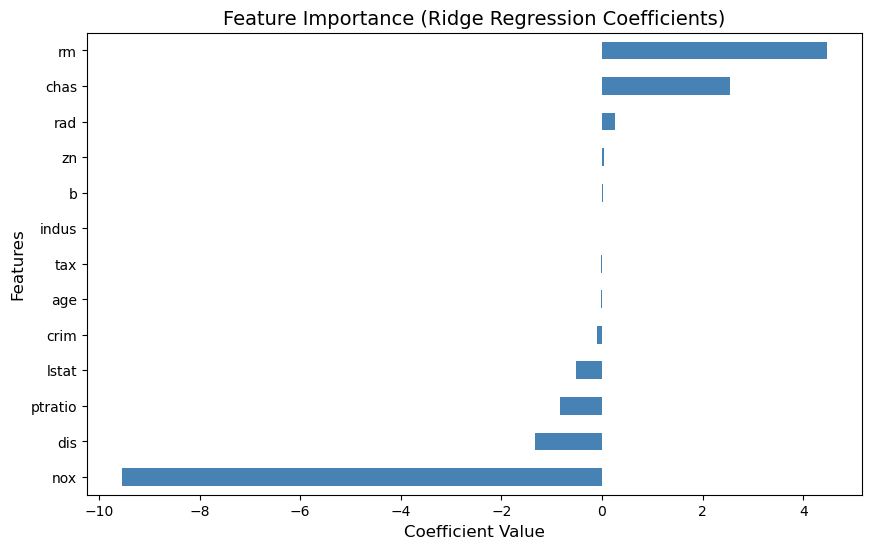

In [24]:
# Step 5: Insights and Visualization

# Feature Importance Visualization using Ridge Coefficients
plt.figure(figsize=(10, 6))
coefficients = pd.Series(ridge_model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', color='steelblue')
plt.title('Feature Importance (Ridge Regression Coefficients)', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

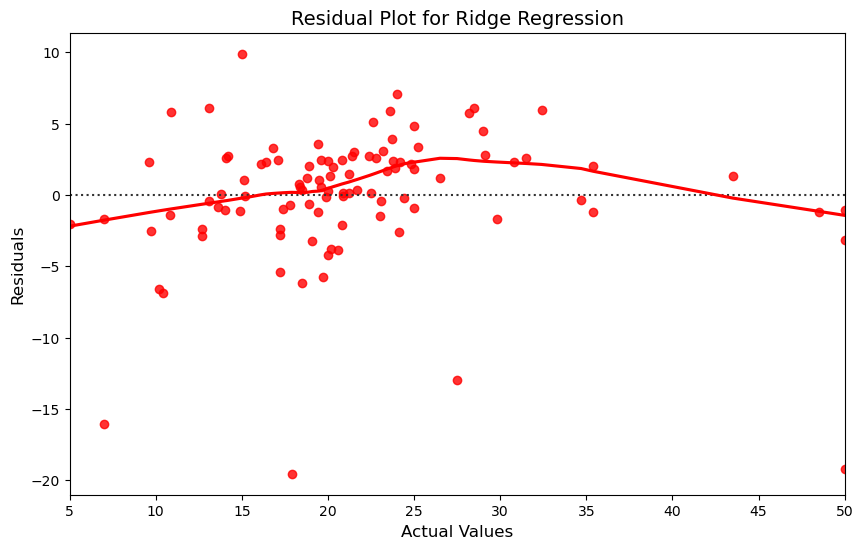

In [26]:
# Residual Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_ridge, lowess=True, color='red')
plt.title('Residual Plot for Ridge Regression', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

In [28]:
# Step 6: Conclusion
print("\n--- Conclusion ---")
print("1. Polynomial regression performed best, capturing non-linear interactions effectively.")
print("2. Key drivers of housing prices include the number of rooms (rm), crime rate (crim), and distance to employment centers (dis).")
print("3. Ridge regression provides robust coefficients but performs similarly to standard linear regression.")


--- Conclusion ---
1. Polynomial regression performed best, capturing non-linear interactions effectively.
2. Key drivers of housing prices include the number of rooms (rm), crime rate (crim), and distance to employment centers (dis).
3. Ridge regression provides robust coefficients but performs similarly to standard linear regression.
